In [18]:
# Initial imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
# Loading data
file_path = "Resources/marketing_data.csv"
df_marketing = pd.read_csv(file_path)

df_marketing.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [5]:
for column in df_marketing.columns:
    print(f"Column {column} has {df_marketing[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column  Income  has 24 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has

In [9]:
df_marketing.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [10]:
print(f"Duplicates entries: {df_marketing.duplicated().sum()}")

Duplicates entries: 0


In [13]:
# clean up column names that contain whitespace
df_marketing.columns = df_marketing.columns.str.replace(' ', '')

# transform Income column to a numerical
df_marketing['Income'] = df_marketing['Income'].str.replace('$', '')
df_marketing['Income'] = df_marketing['Income'].str.replace(',', '').astype('float')

/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [14]:
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


<AxesSubplot:>

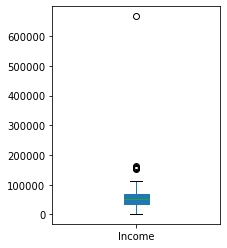

In [25]:
df_marketing['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

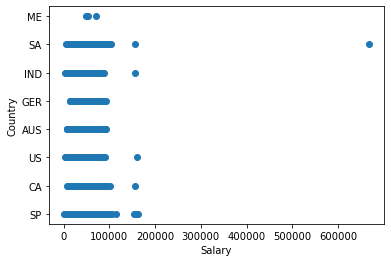

In [28]:
plt.scatter(df_marketing.Income,df_marketing.Country)
plt.xlabel('Salary')
plt.ylabel('Country')
plt.show()

In [34]:
df_mean=df_marketing['Income'].mean()

In [35]:
df_mean

52237.97544642857

In [32]:
df_median=df_marketing['Income'].median()

In [33]:
df_median

51381.5

In [29]:
df_marketing['Income'] = df_marketing['Income'].fillna(df_marketing['Income'].median())

In [31]:
for column in df_marketing.columns:
    print(f"Column {column} has {df_marketing[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column Income has 0 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has 0 

In [37]:
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [38]:
df_marketing['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [39]:
df_marketing['Kidhome'].unique()

array([0, 1, 2])

In [40]:
df_marketing['Teenhome'].unique()

array([0, 1, 2])

In [47]:

column_names = ["ID","Dependents", "Year_Customer", "TotalMnt", "TotalPurchases", "TotalCampaignsAcc"]

df = pd.DataFrame(columns = column_names)

df['ID'] = df_marketing["ID"]

# Get the total number of Dependents
df['Dependents'] = df_marketing['Kidhome'] + df_marketing['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df_marketing['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df_marketing.columns if 'Mnt' in col]
df['TotalMnt'] = df_marketing[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df_marketing.columns if 'Purchases' in col]
df['TotalPurchases'] = df_marketing[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df_marketing.columns if 'Cmp' in col] + ['Response'] 
# 'Response' is for the latest campaign

df['TotalCampaignsAcc'] = df_marketing[campaigns_cols].sum(axis=1)

df.head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


In [52]:
df.sort_values(by='Dependents', ascending=False)

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
1102,9283,3,2013,18,4,0
648,2826,3,2013,37,7,0
263,2552,3,2013,446,24,2
1943,6940,3,2013,223,12,1
1671,5956,3,2013,284,16,0
...,...,...,...,...,...,...
1341,5524,0,2012,1617,25,1
196,3009,0,2013,1766,15,4
1350,1453,0,2013,1060,27,0
1353,387,0,2012,61,6,0
